# Scikit-learn PCA實作

## 載入相關套件

## SVM
## https://www.youtube.com/watch?v=OdlNM96sHio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 載入資料

In [2]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
#預設:2分類
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0) 
#產生同心圓資料, 1_000筆資料, factor:內圈半徑比例, noise:雜訊, random_state:隨機種子

# 資料切割
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, #分割後的比例與原資料相同
                                                    random_state=0)

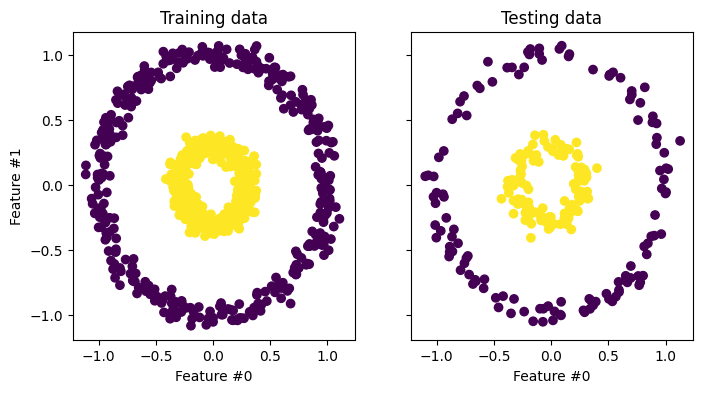

In [3]:
# 繪製訓練及測試資料
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
# _, 故意的, 看上課影片增加說明
# _ 代表不需要的變數
# ncols=2 代表有兩個子圖
# sharex=True, sharey=True 代表兩個子圖共用x軸及y軸
# figsize=(8, 4) 代表整個圖的大小
# train_ax, test_ax 代表兩個子圖的物件
# scatter 代表散佈圖
# c 代表顏色
# set_ylabel 代表設定y軸標籤
# set_xlabel 代表設定x軸標籤
# set_title 代表設定標題
# subplots 代表子圖
# plt 代表matplotlib.pyplot 模組

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train) 
# : 取X_train的所有列, 第0欄及第1欄, c=y_train 代表顏色由y_train決定,
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

## PCA 萃取特徵

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #降維到2維
# fit 代表訓練模型
# transform 代表轉換資料
# fit_transform 代表先訓練模型再轉換資料

X_test_pca = pca.fit(X_train).transform(X_test)

## 繪製原始測試資料及經PCA轉換後的新資料

Text(0.5, 1.0, 'Projection of testing data\n using PCA')

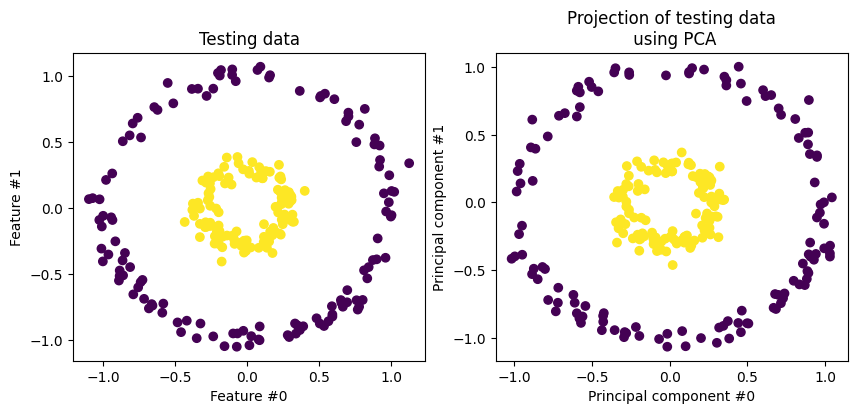

In [5]:
fig, (orig_data_ax, pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(10, 4)
) # figsize=(10, 4) 代表整個圖的大小

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")


## KernelPCA 萃取特徵

In [6]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=6, #10
                       fit_inverse_transform=True, alpha=0.1)
# n_components=None:降維到多少維, kernel:核函數類型, rbf:徑向基函數
# gamma:核函數參數, fit_inverse_transform=True:是否要反轉回原始空間, alpha:正則化參數

X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test) #先訓練模型再轉換資料

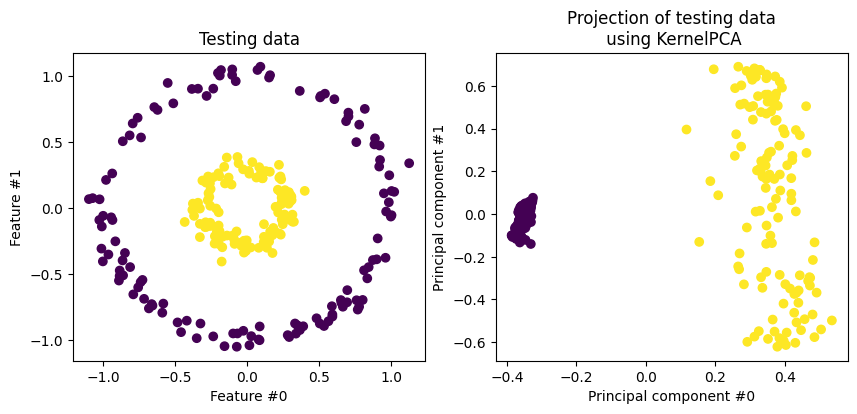

In [7]:
fig, (orig_data_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(10, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

## 載入上/下弦月資料

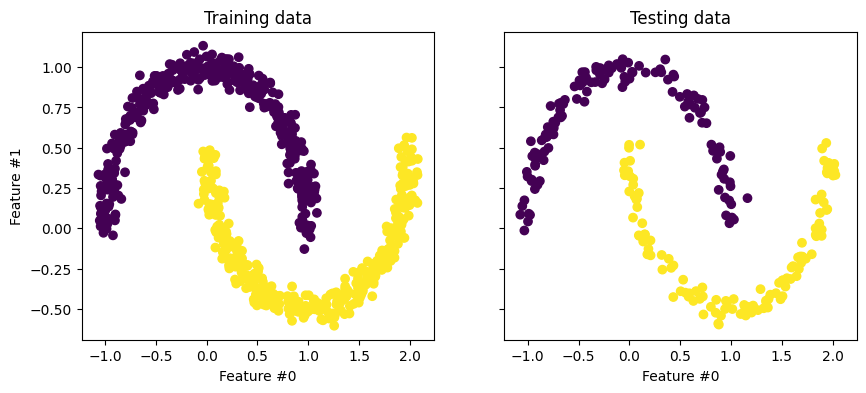

In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1_000, noise=0.05, random_state=0)
# X, y = make_moons(n_samples=1000, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

## PCA 萃取特徵

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_test_pca = pca.fit(X_train).transform(X_test)

Text(0.5, 1.0, 'Projection of testing data\n using PCA')

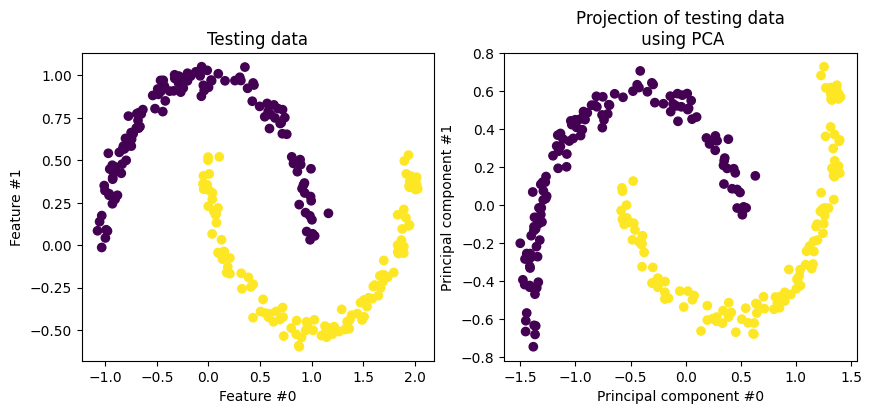

In [10]:
fig, (orig_data_ax, pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(10, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")


## KernelPCA 萃取特徵

In [11]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=None,kernel="rbf", gamma=10.5)#13.2

X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

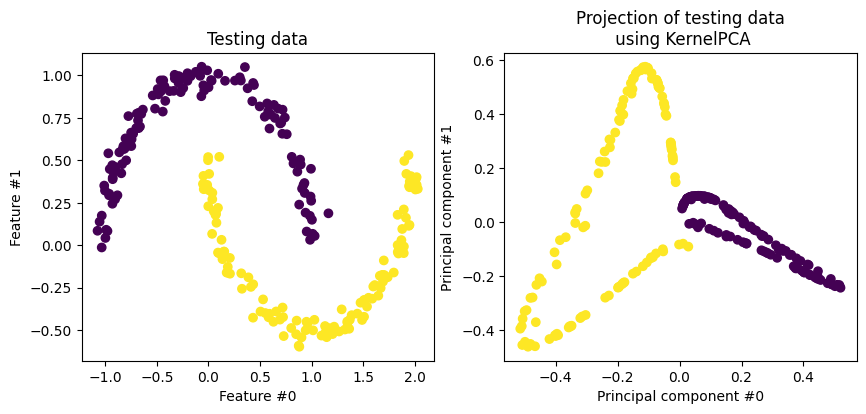

In [12]:
fig, (orig_data_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(10, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")